# Linear Regression

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"data.csv")

In [4]:
df.isnull().any()

sno            False
Temperature    False
Pressure       False
dtype: bool

In [5]:
df.head(2)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012


In [6]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2:3].values

In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred=lr.predict(x_test)

In [12]:
y_test

array([[0.27 ],
       [0.006]])

In [13]:
y_pred

array([[0.09287],
       [0.03035]])

In [14]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)

In [15]:
acc

0.082645793158861

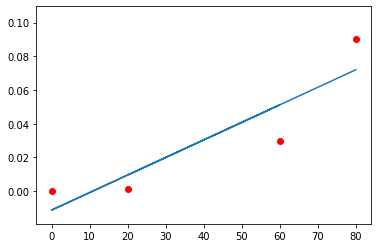

In [16]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train))

Accuracy is too low so we go for polynomial linear regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=8)
x_poly = poly_reg.fit_transform(x)

In [18]:
x_poly

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 2.0000000e+01, 4.0000000e+02, 8.0000000e+03,
        1.6000000e+05, 3.2000000e+06, 6.4000000e+07, 1.2800000e+09,
        2.5600000e+10],
       [1.0000000e+00, 4.0000000e+01, 1.6000000e+03, 6.4000000e+04,
        2.5600000e+06, 1.0240000e+08, 4.0960000e+09, 1.6384000e+11,
        6.5536000e+12],
       [1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07, 7.7760000e+08, 4.6656000e+10, 2.7993600e+12,
        1.6796160e+14],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07, 3.2768000e+09, 2.6214400e+11, 2.0971520e+13,
        1.6777216e+15],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08, 1.0000000e+10, 1.0000000e+12, 1.0000000e+14,
        1.0000000e+16]])

In [19]:
poly_reg.fit(x_poly,y)

PolynomialFeatures(degree=8, include_bias=True, interaction_only=False,
                   order='C')

In [20]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
poly = lin_reg_2.predict(x_poly)

In [22]:
accuracypoly = r2_score(y,poly)

In [23]:
accuracypoly

1.0

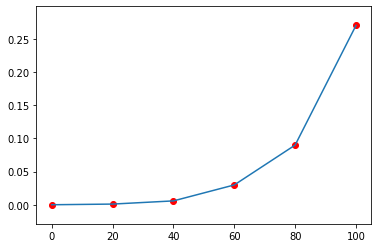

In [24]:
plt.scatter(x,y,color = 'red')
plt.plot(x,poly)

In [27]:
y = lin_reg_2.predict([[1,2,4,8,16,32,64,128,256]])

In [28]:
y

array([[0.00020035]])